# An Analysis of Paleo to present Climate Change Data

<details>

<summary> Student Details </summary>

| Student| Details |
| -------- | -------- |
| Course: | KDATG_L08_Y1 |
| Author: | Rebecca Hannah Quinn |
| Student Number: | G00425671 |

</details>

---

## Project Goals

To Analyse CO2 vs Temperature Anomaly for the past 800,000 years to the present day.
To examine the change in the polar-ice coverage alongside this.
To examine the changes in Ireland and Irish climate change signals.

In gathering this information and data I will fuse and analyse the data using pandas dataframes and export the results to csv and json formats.

I will be anaylising the data, the trends, the relationships between them including but not limited to: temporal leads, lags, and frequencies. I will also use synthesised data to predict global temperature anomoly over the next few decades and compare to published models of the same to see if atmospherice CO2 trends continue and comment on the accelerated warming based on the latest features with temperatures polar-ice coverage and ocean and sea levels.


TABLE OF CONTENTS DOES NOT LINK CORRECTLY - CHECK AT END

<details>

<summary> Table of Contents </summary>

[INTRODUCTION](#01)

[PRE-PROCESSING](#02)

[ANALYSIS](#03)

[PREDICITONS](#04)

[FURTHER COMMENT](#05)

[PLOTS](#06)

</details>

---


## Introduction


There have been studies on the Earth"s climate that have resulted in data as far back as 800,000 years by extracting core samples from deep beneath the ice sheets of Greenland and Antarctica. These samples contain detailed information on air temperature and CO2 levels that are trapped within them. Current polar records demonstrate a close association between atmospheric carbon dioxide and temperature in the natural world. In essence, when one increases, the other one follows.

However, there is still some uncertainty about which occurred first - a spike in temperature or CO2. Until now, the most extensive records to date on a significant change in Earth"s climate came from the EPICA Dome C ice core on the Antarctic Plateau. The data, which covered the end of the last ice age, between 20,000 and 10,000 years ago, indicated that CO2 levels could have lagged behind rising global temperatures by as much as 1,400 years.
[1]: https://www.scientificamerican.com/article/ice-core-data-help-solve/#:~:text=Scientists%20use%20air%20trapped%20in,than%20the%20ice%20surrounding%20them.


<a id="01i">

## Pre-processing

</a>

---


### Import Packages

In [54]:
#importing packages required for analysis and visualization
import requests
from io import StringIO
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the Data

### CO2

---


#### CO2 Data 1 - NCEI 1855 - 1960

In [55]:
epica1col = ["year", "co2", "sigma"]
epica8kyr1 = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite", skiprows=59, names=epica1col)
epica8kyr1["year"] = epica8kyr1["year"].astype(int)

# The code below flips the sign of the "year" values and adds 1950 to them. This is useful for converting the "year" values to a specific reference point year 1950. 
# Clarify why the year transformation is done.
# Make sure the data type conversions are necessary.

epica8kyr1["year"] = -1 * epica8kyr1["year"] + 1950
epica8kyr1 = epica8kyr1.sort_values(by="year", ascending=False)
epica8kyr1.to_csv("epica8kyr1.csv", index=False)

#### CO2 Data 2 - Global Monitoring Laboratory - 1959 - 2023

In [56]:
epica2col = ["year", "co2", "unc"]
epica8kyr2 = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv", skiprows=44, sep=",", names=epica2col)

#### CO2 Data 3 - Mauna Lon Observeratory - 1984 - 2023

In [57]:
epica3col = ["year", "co2", "unc"]
url3 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
response = requests.get(url3)
if response.status_code == 200:
    text = response.text
    epica8kyr3 = pd.read_fwf(StringIO(text), names=epica3col, skiprows=45, header=0)
    epica8kyr3 = epica8kyr3.sort_values(by="year", ascending=False)  #corrected
    epica8kyr3.to_csv("epica8kyr3.csv", index=False)

##### Initial Analysis

###### Epica CO2 Data 1

In [58]:
%display epica8kyr1.head() #head function to check first data lines

UsageError: Line magic function `%display` not found.


In [ ]:
epica8kyr1.tail()

In [ ]:
epica8kyr1.columns #info and columns for merging

In [ ]:
epica8kyr1.info()

---

###### Epica CO2 Data 2

In [ ]:
epica8kyr2.head()

In [ ]:
epica8kyr2.tail()

In [ ]:
epica8kyr2.columns

In [ ]:
epica8kyr2.info()

---

###### Epica CO2 Data 3

In [ ]:
epica8kyr3.head()

In [ ]:
epica8kyr3.tail()

In [ ]:
epica8kyr3.columns

In [ ]:
epica8kyr3.info()

---

---

### CH4

---


#### CH4 Data 1

In [ ]:
colnames = ["year", "ch4", "unc"]
noaach4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"

response = requests.get(noaach4)

if response.status_code == 200:
    text = response.text
    noaach4df = pd.read_fwf(StringIO(response.text), names=colnames, widths=[6, 12, 8], skiprows=44, header=0)
    noaach4sort = noaach4df.sort_index(ascending=False)
    noaach4sort.to_csv("noaach4new.csv", index=False)

#### CH4 Data 2

In [ ]:
ch4names = ["year", "ch4"]
ch4data = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", usecols=[0, 1], skiprows=7, header=0, names=ch4names)
ch4data["year"] = pd.to_numeric(ch4data["year"], errors="coerce")
ch4data = ch4data.dropna(subset=["year"])
ch4data["year"] = ch4data["year"].astype(int)
ch4data.to_csv("ch4data.csv")

##### Initial Analysis

##### CH4 DATA 1

In [ ]:
noaach4sort.head()

In [ ]:
noaach4sort.tail()

In [ ]:
noaach4sort.info()

In [ ]:
noaach4sort.describe()

In [ ]:
noaach4sort.columns

##### CH4 DATA 2

In [ ]:
ch4data.head()

In [ ]:
ch4data.tail()

In [ ]:
ch4data.info()

In [ ]:
ch4data.describe()

In [ ]:
ch4data.columns

### Temperature

---


#### Temperature Data 1

In [ ]:
epicadeut = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"

response = requests.get(epicadeut)

if response.status_code == 200:
    text = response.text
    epicadeutdf = pd.read_csv(StringIO(text), sep="\s+", skiprows=89, header=0)
    epicadeutdf.rename(columns={"Age": "year"}, inplace=True)
    epicadeutdf.rename(columns={"Temperature": "temp"}, inplace=True)
    epicadeutdf["year"] = epicadeutdf["year"].astype(int)
    epicadeutdf["year"] = -1 * epicadeutdf["year"] + 1950
    epicadeutdf["temp"] = epicadeutdf["temp"] + (-54.5)
    
    epicacols = epicadeutdf.iloc[:, [2, 4]]

epicacols.to_csv("epicadeut.csv", index=False)

#### Temperature Data 2

In [ ]:
noaanames=["year", "temp"]
noaatemp = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows=5, names=noaanames, header=0)
noaatemp["temp"] = pd.to_numeric(noaatemp["temp"], errors="coerce")
noaatemp["temp"] = noaatemp["temp"] + (-54.5)
noaasort = noaatemp.sort_values(by="year", ascending=False)
noaasort.to_csv("noaatemp.csv", index=False)

##### Initital Analysis

In [ ]:
epicacols.head()

In [ ]:
epicacols.tail()

In [ ]:
epicacols.info()

In [ ]:
epicacols.describe()

In [ ]:
epicacols.columns

---

In [ ]:
noaasort.head()

In [ ]:
noaasort.tail()

In [ ]:
noaasort.info()

In [ ]:
noaasort.describe()

In [ ]:
noaasort.columns

## Initial Data Adjustments

---

#### Data Clean-up

In [ ]:
epica8kyr2["year"] = epica8kyr2["year"].astype(int) #change data within the year column to an integer
epica8kyr2 = epica8kyr2.sort_values(by="year", ascending=False)  #sort column by year
epica8kyr2.to_csv("epica8kyr2.csv", index=False) #save to csv

##### CO2 - Merge Data

In [ ]:
mergeddata = pd.merge(epica8kyr3, epica8kyr2, on=["year", "co2", "unc"], how="outer")
mergeddata = pd.merge(mergeddata, epica8kyr1, on=["year", "co2"], how="outer")

mergeddata.to_csv("mergedco2data.csv", index=False)
mergeddata.columns #check columns merged correctly

##### CH4 - Merge Data

In [ ]:
mergech4 = pd.merge(ch4data, noaach4sort, on=["year", "ch4"], how="outer")
mergech4.to_csv("mergedch4.csv", index=False)

In [ ]:
mergech4.columns

#### Temperature

##### Temperature - Merge Data

In [ ]:
mergetemp = pd.merge(noaasort, epicacols, on=["year", "temp"], how="outer")
mergetemp.to_csv("tempsmerge.csv", index=False)

In [ ]:
mergetemp.head()

In [ ]:
mergetemp.shape #check the merge went correctly

### Statistical Measurement

---

### CO2

In [ ]:
mean_value = mergeddata["co2"].mean()
print(f"CO2 Data Mean Value: {mean_value}")

median_value = mergeddata["co2"].median()
print(f"CO2 Data Median Value: {median_value}")

std_deviation = mergeddata["co2"].std()
print(f"CO2 Data Standard Deviation: {std_deviation}")

correlation = mergeddata["co2"].corr(mergeddata["year"])
print(f"CO2 Data Standard Deviation: {correlation}")

### CH4

In [ ]:
mean_value = mergech4["ch4"].mean()
print(f"CH4 Data Mean Value: {mean_value}")

median_value = mergech4["ch4"].median()
print(f"CH4 Data Median Value: {median_value}")

std_deviation = mergech4["ch4"].std()
print(f"CH4 Data Standard Deviation: {std_deviation}")

correlation = mergech4["ch4"].corr(mergech4["year"])
print(f"CH4 Data Standard Deviation: {correlation}")

### TEMPERATURE

In [ ]:
mean_value = mergetemp["temp"].mean()
print(f"Temp Data Mean Value: {mean_value}")

median_value = mergetemp["temp"].median()
print(f"Temp Data Median Value: {median_value}")

std_deviation = mergetemp["temp"].std()
print(f"Temp Data Standard Deviation: {std_deviation}")

correlation = mergetemp["temp"].corr(mergetemp["year"])
print(f"Temp Data Standard Deviation: {correlation}")

### Irish Context

---


### Temperature

In [ ]:
sherkintemp = pd.read_csv("DATA Files/mly775.csv", skiprows=19, delimiter=",")

sherkintemp.head()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2004,5,11.6,17.6,5.3,14.4,8.8,37.1,2.4,9.7,57,
1,2004,6,14.2,20.0,7.2,16.7,11.8,,2.8,10.9,36,
2,2004,8,15.7,20.7,8.4,18.3,13.1,110.9,4.2,10.5,41,
3,2004,9,14.4,21.3,7.3,16.2,12.6,94.0,3.6,13.5,51,
4,2004,10,10.7,14.8,2.8,13.0,8.4,141.5,0.1,14.0,55,


In [ ]:
sherkintemp.columns

Index(['year', 'month', 'meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 'rain',
       'gmin', 'wdsp', 'maxgt', 'sun'],
      dtype='object')

In [ ]:
colconvert = ["meant", "maxtp", "mintp"]
sherkintemp[colconvert] = sherkintemp[colconvert].apply(pd.to_numeric, errors='coerce') # code converts specific columns to numeric data types
# add more error handling through out project
# group monthly data by year and sum each month to get the yearly total to make plots clearer
irishyearlytemp = sherkintemp.groupby("year").agg({
    "maxtp": "sum",  
    "mintp": "sum",  
    "meant": "sum"   
}).reset_index()

    year  maxtp  mintp  meant
0   2004  121.5   36.1   86.1
1   2005  179.8   44.9  123.7
2   2006  194.7   53.0  135.5
3   2007  199.4   54.2  138.2
4   2008  171.3   49.9  121.7
5   2009  192.0   48.5  129.2
6   2010  190.0   29.5  120.6
7   2011  189.3   56.3  130.2
8   2012  195.2   51.9  132.0
9   2013  192.1   49.6  130.8
10  2014  195.1   57.7  138.1
11  2015  189.2   56.4  131.0
12  2016  193.5   59.2  131.6
13  2017  196.5   59.7  134.6
14  2018  201.4   38.7  133.3
15  2019  196.8   49.1  135.3
16  2020  195.8   50.2  133.2
17  2021  204.6   61.0  136.0
18  2022  209.0   55.5  140.3
19  2023  197.9   59.9  141.8
20  2024  115.4   31.2   76.5


Index(['year', 'maxtp', 'mintp', 'meant'], dtype='object')

In [ ]:
# test code
print(irishyearlytemp)

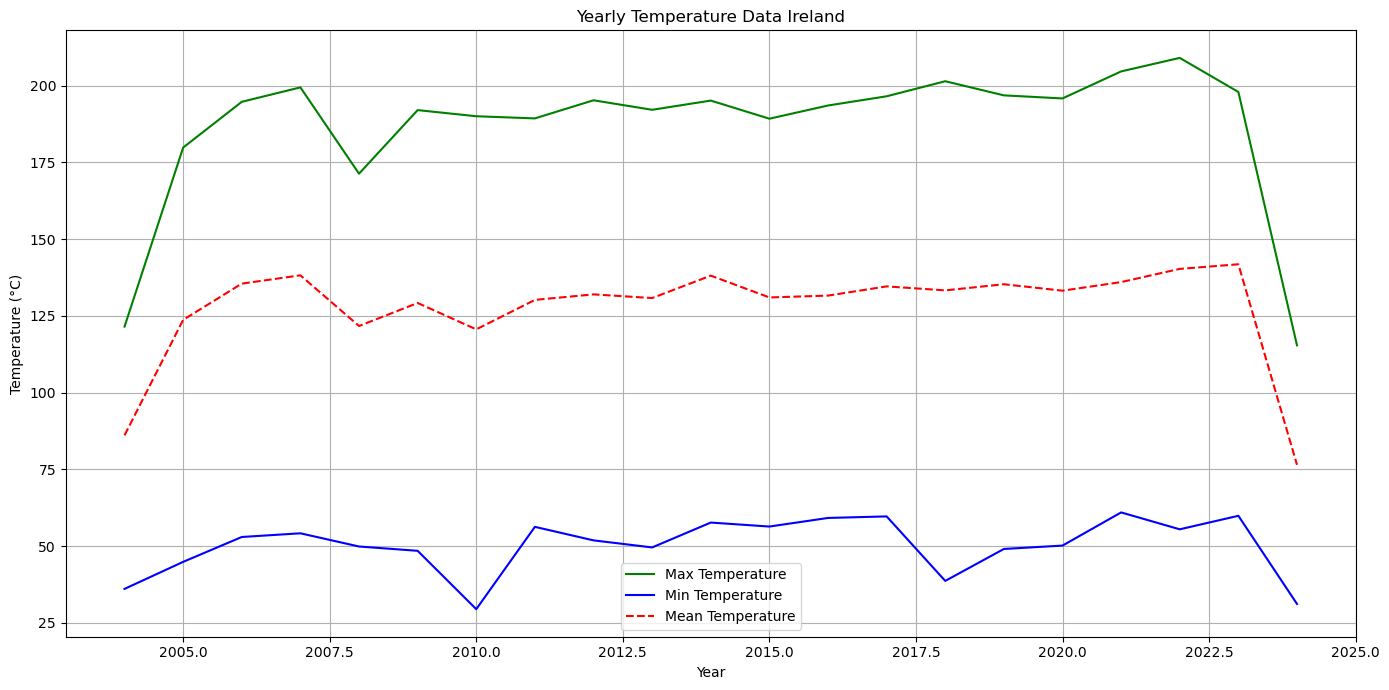

In [59]:
# Plotting irish temperature
plt.figure(figsize=(14, 7))

# maxtp, mintp, and meant
plt.plot(irishyearlytemp["year"], irishyearlytemp["maxtp"], color="green", label="Max Temperature")
plt.plot(irishyearlytemp["year"], irishyearlytemp["mintp"], color="blue", label="Min Temperature")
plt.plot(irishyearlytemp["year"], irishyearlytemp["meant"], color="red", label="Mean Temperature", linestyle="--")

# labels and title
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Yearly Temperature Data Ireland")
plt.legend()

# show and save image of plot
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("irishyearlytemp04-24.jpg")

### Rainfall

In [ ]:
weatherstations = pd.read_csv("DATA Files/weatherstationdata.csv")

weatherstations.columns
#to find the oldest weather station in the country that is still open to get a larger set of data
weatherstations["open year "] = pd.to_datetime(weatherstations["open year "], errors="coerce")

weatherstationsoldest = weatherstations.sort_values(by="open year ")
weatherstationsoldest.head(25)

# I will use Foukesmill Station 108 for this as the records start in 1943 to present 

In [ ]:
station108 = pd.read_csv("DATA Files/mly108-foulkesmill1873.csv")

station108.head(14)
# testing the csv was read correctly


In [ ]:
yearlyrainfall = station108.groupby("year")["rain"].sum().reset_index()

yearlyrainfall.head(14) #testing groubed by worked for each year/month


## Analysis



### Plot Overview

In [ ]:
years = mergeddata["year"]
co2values = mergeddata["co2"]
ch4values = mergech4["ch4"]
tempvalues = mergetemp["temp"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.lineplot(x=years, y=tempvalues, ax=ax1, label="Temp")
sns.lineplot(x=years, y=co2values, ax=ax2, label="CO2")
sns.lineplot(x=years, y=ch4values, ax=ax2, label="CH4")

fig.suptitle("CO2 and CH4 Over Years")
ax1.set_xlabel("Year")

ax1.set_ylabel("Temp")
ax2.set_ylabel("CO2")
ax2.set_ylabel("CH4")

ax1.legend()
ax2.legend()

plt.tight_layout()

plt.show()


### CO2 - Plots

In [ ]:
plt.figure(figsize=(18, 16))
plt.plot(mergeddata["year"], mergeddata["co2"], color="blue")
plt.xlabel("YEAR", fontsize=20)
plt.ylabel("CO2", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CO2 V Time", fontsize=20)
plt.tight_layout()
plt.savefig("lineplot1.png")
#### Plot
#SNS Lineplot
#style
sns.set_style("whitegrid")
sns.set_context("paper") 

In [ ]:
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergeddata, x="year", y="co2", color="green")

#labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Levels", fontsize=14)
plt.title("CO2 Levels Over Time", fontsize=14)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()  #additional spacing
plt.savefig("snslineplotnew.png")

### CH4 - Plots

In [ ]:
#style
sns.set_style("whitegrid")
sns.set_context("paper")

#size
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

In [ ]:
plt.figure(figsize=(16, 12))
#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

In [ ]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")
sns.lineplot(data=ch4data, x="year", y="ch4", label="Mean CH4")

plt.title("CO2 and Mean CH4 from 8kyr before present")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

### Temperature - Plots

In [ ]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")

plt.title("CO2")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergetemp, x="year", y="temp", label="Temp")

plt.title("Temperature")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

### Rainfall - Plots

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(yearlyrainfall["year"], yearlyrainfall["rain"], label="Irish Rainfall 1941-2024", color="blue", linewidth=1)
plt.scatter(yearlyrainfall["year"], yearlyrainfall["rain"], color="red", edgecolor="red", s=50, marker="o")

plt.xticks(yearlyrainfall["year"], rotation=45, fontsize=8)

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Irish Rainfall 1941-2024")
plt.grid(axis="x", linestyle="--", color="gray", alpha=0.7)

plt.legend()

### Trends


### Relationships



---

<a id="03i">

## Predictions

</a>

### Synthetic Data


### Comparisons with Published Climate Models

In [ ]:
#SECTION 3 - PYTHON CELL



---

<a id="07i">

## REFERENCES

</a>


---